<a href="https://colab.research.google.com/github/call493/MLFC/blob/main/_notebooks/02-02-basis-functions-and-generalisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basis Functions and Generalisation

### Neil Lawrence

### 2025-09-09

**Abstract**: This lecture will cover generalisation in machine
learning.

$$
$$

<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!---->
<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!-- The last names to be defined. Should be defined entirely in terms of macros from above-->
<!--

-->

## ML Foundations Course Notebook Setup

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_mlfc/includes/mlfc-notebook-setup.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_mlfc/includes/mlfc-notebook-setup.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

We install some bespoke codes for creating and saving plots as well as
loading data sets.

In [1]:
%%capture
%pip install notutils
%pip install pods
%pip install mlai

In [2]:
import notutils
import pods
import mlai
import mlai.plot as plot

In [3]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

<!--setupplotcode{import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('paper')
sns.set_palette('colorblind')}-->

# Nonlinear Regression with Linear Models

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/basis-functions-and-generalisation.gpp.markdown" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/basis-functions-and-generalisation.gpp.markdown', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

## Nonlinear Regression

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/non-linear-regression-intro.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/non-linear-regression-intro.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

We’ve now seen how we may perform linear regression. Now, we are going
to consider how we can perform *non-linear* regression. However, before
we get into the details of how to do that we first need to consider in
what ways the regression can be non-linear. Multivariate linear
regression allows us to build models that take many features into
account when making our prediction. In this session we are going to
introduce *basis functions*. The term seems complicted, but they are
actually based on rather a simple idea. If we are doing a multivariate
linear regression, we get extra features that *might* help us predict
our required response varible (or target value), $y$. But what if we
only have one input value? We can actually artificially generate more
input values with basis functions.

## Non-linear in the Inputs

When we refer to non-linear regression, we are normally referring to
whether the regression is non-linear in the input space, or non-linear
in the *covariates*. The covariates are the observations that move with
the target (or *response*) variable. In our notation we have been using
$\mathbf{ x}_i$ to represent a vector of the covariates associated with
the $i$th observation. The coresponding response variable is $y_i$. If a
model is non-linear in the inputs, it means that there is a non-linear
function between the inputs and the response variable. Linear functions
are functions that only involve multiplication and addition, in other
words they can be represented through *linear algebra*. Linear
regression involves assuming that a function takes the form $$
f(\mathbf{ x}) = \mathbf{ w}^\top \mathbf{ x}
$$ where $\mathbf{ w}$ are our regression weights. A very easy way to
make the linear regression non-linear is to introduce non-linear
functions. When we are introducing non-linear regression these functions
are known as *basis functions*.

# Basis Functions

## Basis Functions

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/basis-functions-intro.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/basis-functions-intro.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Here’s the idea, instead of working directly on the original input
space, $\mathbf{ x}$, we build models in a new space,
$\boldsymbol{ \phi}(\mathbf{ x})$ where $\boldsymbol{ \phi}(\cdot)$ is a
*vector-valued* function that is defined on the space $\mathbf{ x}$.

## Quadratic Basis

Remember, that a *vector-valued function* is just a vector that contains
functions instead of values. Here’s an example for a one dimensional
input space, $x$, being projected to a *quadratic* basis. First we
consider each basis function in turn, we can think of the elements of
our vector as being indexed so that we have $$
\begin{align*}
\phi_1(x) & = 1, \\
\phi_2(x) & = x, \\
\phi_3(x) & = x^2.
\end{align*}
$$ Now we can consider them together by placing them in a vector, $$
\boldsymbol{ \phi}(x) = \begin{bmatrix} 1\\ x\\ x^2\end{bmatrix}.
$$ For the vector-valued function, we have simply collected the
different functions together in the same vector making them notationally
easier to deal with in our mathematics.

When we consider the vector-valued function for each data point, then we
place all the data into a design matrix. The result is a matrix valued
function, $$
\boldsymbol{ \Phi}(\mathbf{ x}) =
\begin{bmatrix} 1 & x_1 &
x_1^2 \\
1 & x_2 & x_2^2\\
\vdots & \vdots & \vdots \\
1 & x_n& x_n^2
\end{bmatrix}
$$ where here we are still considering the one dimensional input setting
so $\mathbf{ x}$ here represents a vector of our inputs with $n$
elements.

Let’s try constructing such a matrix for a set of inputs. First of all,
we create a function that returns the matrix valued function.

In [ ]:
import numpy as np

In [ ]:
def quadratic(x, **kwargs):
    """Take in a vector of input values and return the design matrix associated
    with the basis functions."""
    return np.hstack([np.ones((x.shape[0], 1)), x, x**2])

## Functions Derived from Quadratic Basis

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/quadratic-basis.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/quadratic-basis.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

$$
f(x) = {\color{red}{w_0}} + {\color{magenta}{w_1 x}} + {\color{blue}{w_2 x^2}}
$$

In [ ]:
import matplotlib.pyplot as plt
import mlai.plot as plot

In [ ]:
f, ax = plt.subplots(figsize=plot.big_wide_figsize)
loc =[[0, 1.4,],
      [0, -0.7],
      [0.75, -0.2]]
text =[r'$\phi(x) = 1$',
       r'$\phi(x) = x$',
       r'$\phi(x) = x^2$']

plot.basis(quadratic, x_min=-1.3, x_max=1.3,
           fig=f, ax=ax, loc=loc, text=text,
           diagrams='./ml')


<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/quadratic_basis002.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>The set of functions which are combined to form a *quadratic*
basis.</i>

In [ ]:
import notutils as nu
from ipywidgets import IntSlider

In [ ]:
import notutils as nu

In [ ]:
nu.display_plots('quadratic_basis{num_basis:0>3}.svg',
                            directory='./ml',
                            num_basis=IntSlider(0,0,2,1))

This function takes in an $n\times 1$ dimensional vector and returns an
$n\times 3$ dimensional *design matrix* containing the basis functions.
We can plot those basis functions against there input as follows.

In [ ]:
# first let's generate some inputs
n = 100
x = np.zeros((n, 1))  # create a data set of zeros
x[:, 0] = np.linspace(-1, 1, n) # fill it with values between -1 and 1

Phi = quadratic(x)

fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
ax.set_ylim([-1.2, 1.2]) # set y limits to ensure basis functions show.
ax.plot(x[:,0], Phi[:, 0], 'r-', label = r'$\phi=1$', linewidth=3)
ax.plot(x[:,0], Phi[:, 1], 'g-', label = r'$\phi=x$', linewidth=3)
ax.plot(x[:,0], Phi[:, 2], 'b-', label = r'$\phi=x^2$', linewidth=3)
ax.legend(loc='lower right')
_ = ax.set_title('Quadratic Basis Functions')

The actual function we observe is then made up of a sum of these
functions. This is the reason for the name basis. The term *basis* means
‘the underlying support or foundation for an idea, argument, or
process,’ and in this context they form the underlying support for our
prediction function. Our prediction function can only be composed of a
weighted linear sum of our basis functions.

## Quadratic Functions

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/quadratic_function002.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Functions constructed by weighted sum of the components of a
quadratic basis.</i>

In [ ]:
import notutils as nu
from ipywidgets import IntSlider

In [ ]:
import notutils as nu

In [ ]:
nu.display_plots('quadratic_function{num_function:0>3}.svg',
                            directory='./ml',
                            num_function=IntSlider(0,0,2,1))

## Choice of Basis

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/basis-functions-different-bases.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/basis-functions-different-bases.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Our choice of basis can be made based on what our beliefs about what is
appropriate for the data. For example, the polynomial basis extends the
quadratic basis to aribrary degree, so we might define the $j$th basis
function associated with the model as $$
\phi_j(x_i) = x_i^j
$$ which is known as the *polynomial basis*.

## Polynomial Basis

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/polynomial-basis.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/polynomial-basis.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

The polynomial basis combines higher order polynomials together to
create the function. For example, the fourth order polynomial has five
components to its basis function. $$
\phi_j(x) = x^j
$$

In [ ]:
import numpy as np

In [ ]:
import mlai
import inspect
file_path = inspect.getfile(mlai.polynomial)

In [ ]:
%load -s polynomial {file_path}

In [ ]:
import matplotlib.pyplot as plt
import mlai.plot as plot
import mlai

In [ ]:
f, ax = plt.subplots(figsize=plot.big_wide_figsize)
f, ax = plt.subplots(figsize=plot.big_wide_figsize)
loc =[[0, 1.4,],
      [0, -0.7],
      [0.75, -0.2],
     [-0.75, -0.2],
     [-0.75, 2]]
text =[r'$\phi(x) = 1$',
       r'$\phi(x) = x$',
       r'$\phi(x) = x^2$',
       r'$\phi(x) = x^3$',
       r'$\phi(x) = x^4$']

plot.basis(mlai.polynomial, x_min=-1.3, x_max=1.3,
           fig=f, ax=ax, loc=loc, text=text, num_basis=5,
           diagrams='./ml')

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/polynomial_basis004.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>The set of functions which are combined to form a
*polynomial* basis.</i>

In [ ]:
import notutils as nu
from ipywidgets import IntSlider
import notutils as nu

In [ ]:
nu.display_plots('polynomial_basis{num_basis:0>3}.svg',
                            directory='./ml',
                            num_basis=IntSlider(0,0,4,1))

In [ ]:
nu.display_prediction(basis=mlai.polynomial, num_basis=5)

## Functions Derived from Polynomial Basis

$$
f(x) = {\color{red}{w_0}} + {\color{magenta}{w_1 x}} + {\color{blue}{w_2 x^2}} + {\color{green}{w_3 x^3}} + {\color{cyan}{w_4 x^4}}
$$

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/polynomial_function002.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>A random combination of functions from the polynomial
basis.</i>

In [ ]:
import notutils as nu
from ipywidgets import IntSlider
import notutils as nu

In [ ]:
nu.display_plots('polynomial_function{func_num:0>3}.svg',
                            directory='./ml',
                            func_num=IntSlider(0,0,2,1))

To aid in understanding how a basis works, we’ve provided you with a
small interactive tool for exploring this polynomial basis. The tool can
be summoned with the following command.

In [ ]:
import notutils as nu

In [ ]:
import notutils as nu

In [ ]:
nu.display_prediction(basis=mlai.polynomial, num_basis=5)

Try moving the sliders around to change the weight of each basis
function. Click the control box `display_basis` to show the underlying
basis functions (in red). The prediction function is shown in a thick
blue line. *Warning* the sliders aren’t presented quite in the correct
order. `w_0` is associated with the bias, `w_1` is the linear term,
`w_2` the quadratic and here (because we have four basis functions) we
have `w_3` for the *cubic* term. So the subscript of the weight
parameter is always associated with the corresponding polynomial’s
degree.

### Exercise 1

Try increasing the number of basis functions (thereby increasing the
*degree* of the resulting polynomial). Describe what you see as you
increase number of basis up to 10. Is it easy to change the function in
intiutive ways?

### Exercise 1 Answer

Write your answer to Exercise 1 here

In [ ]:
# Use this box for any code you need



## Different Basis

The polynomial basis is widely used in Engineering and graphics, but it
has some drawbacks in machine learning: outside the input region between
-1 and 1, the values of the polynomial basis rise very quickly.

Now we look at basis functions that have been used as the *activation*
functions in neural network model.

## Radial Basis Functions

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/radial-basis.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/radial-basis.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Another type of basis is sometimes known as a ‘radial basis’ because the
effect basis functions are constructed on ‘centres’ and the effect of
each basis function decreases as the radial distance from each centre
increases.

$$
\phi_j(x) = \exp\left(-\frac{(x-\mu_j)^2}{\ell^2}\right)
$$

In [ ]:
import mlai
import inspect
file_path = inspect.getfile(mlai.radial)

In [ ]:
%load -s radial {file_path}

In [ ]:
import matplotlib.pyplot as plt
import mlai.plot as plot
import mlai

In [ ]:
f, ax = plt.subplots(figsize=plot.big_wide_figsize)

loc = [[-1.25, -0.4],
       [0., 1.25],
       [1.25, -0.4]]
text = [r'$\phi_1(x) = e^{-(x + 1)^2}$',
        r'$\phi_2(x) = e^{-2x^2}$',
        r'$\phi_3(x) = e^{-2(x-1)^2}$']
plot.basis(mlai.radial, x_min=-2, x_max=2,
           fig=f, ax=ax, loc=loc, text=text,
           diagrams='./ml')

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/radial_basis002.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>The set of functions which are combined to form the radial
basis.</i>

In [ ]:
import notutils as nu
from ipywidgets import IntSlider

In [ ]:
nu.display_plots('radial_basis{num_basis:0>3}.svg',
                            directory='./ml',
                            num_basis=IntSlider(0,0,2,1))

In [ ]:
nu.display_prediction(basis=mlai.radial, num_basis=3)

## Functions Derived from Radial Basis

$$
f(x) = \color{red}{w_1 e^{-2(x+1)^2}}  + \color{magenta}{w_2e^{-2x^2}} + \color{blue}{w_3 e^{-2(x-1)^2}}
$$

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/radial_function002.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>A radial basis is made up of different locally effective
functions centered at different points.</i>

In [ ]:
import notutils as nu
from ipywidgets import IntSlider

In [ ]:
nu.display_plots('radial_function{func_num:0>3}.svg',
                            directory='./ml',
                            func_num=IntSlider(0,0,2,1))

## Rectified Linear Units

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/relu-basis.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/relu-basis.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

The rectified linear unit is a basis function that emerged out of the
deep learning community. Rectified linear units are popular in the
current generation of multilayer perceptron models, or deep networks.
These basis functions start flat, and then become linear functions at a
certain threshold. $$
\phi_j(x) = xH(v_j x+ v_0)
$$

In [ ]:
import numpy as np

In [ ]:
import mlai
import inspect
file_path = inspect.getfile(mlai.relu)

In [ ]:
%load -s relu {file_path}

In [ ]:
import matplotlib.pyplot as plt
import mlai.plot as plot
import mlai

In [ ]:
f, ax = plt.subplots(figsize=plot.big_wide_figsize)
loc =[[0, 1.4,],
      [-1, -0.5],
      [-0.33, 0.2],
      [0.33, -0.5],
      [1, 0.2]]
text =[r'$\phi(x) = 1$',
       r'$\phi(x) = xH(x+1.0)$',
       r'$\phi(x) = xH(x+0.33)$',
       r'$\phi(x) = xH(x-0.33)$',
       r'$\phi(x) = xH(x-1.0)$']
plot.basis(mlai.relu, x_min=-2.0, x_max=2.0,
           fig=f, ax=ax, loc=loc, text=text,
           diagrams='./ml',
           num_basis=5)

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/relu_basis004.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>The set of functions which are combined to form a rectified
linear unit basis.</i>

In [ ]:
import notutils as nu
from ipywidgets import IntSlider

In [ ]:
import notutils as nu

In [ ]:
nu.display_plots('relu_basis{num_basis:0>3}.svg',
                            directory='./ml',
                            num_basis=IntSlider(0,0,4,1))

In [ ]:
import notutils as nu

In [ ]:
nu.display_prediction(basis=mlai.relu, num_basis=5)

## Functions Derived from Relu Basis

$$
f(x) = \color{red}{w_0}   + \color{magenta}{w_1 xH(x+1.0) } + \color{blue}{w_2 xH(x+0.33) } + \color{green}{w_3 xH(x-0.33)} +  \color{cyan}{w_4 xH(x-1.0)}
$$

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/relu_function002.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>A rectified linear unit basis is made up of different
rectified linear unit functions centered at different points.</i>

In [ ]:
import notutils as nu
from ipywidgets import IntSlider

In [ ]:
import notutils as nu

In [ ]:
nu.display_plots('relu_function{func_num:0>3}.svg',
                            directory='./ml',
                            func_num=IntSlider(0,0,2,1))

## Hyperbolic Tangent Basis

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/hyperbolic-tangent-basis.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/hyperbolic-tangent-basis.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

The rectified linear unit is a basis function that used to be used a lot
for neural network models. It’s related to the sigmoid function by a
scaling. $$
\phi_j(x) = \tanh(v_j x+ v_0)
$$

In [ ]:
import numpy as np

In [ ]:
import mlai
import inspect
file_path = inspect.getfile(mlai.hyperbolic_tangent)

In [ ]:
%load -s hyperbolic_tangent {file_path}

Sigmoid or hyperbolic tangent basis was popular in the original
generation of multilayer perceptron models, or deep networks. These
basis functions start flat, rise and then saturate.

In [ ]:
import matplotlib.pyplot as plt
import mlai.plot as plot
import mlai

In [ ]:
f, ax = plt.subplots(figsize=plot.big_wide_figsize)
loc =[[0, 1.4,],
      [-1, -0.7],
      [-0.33, 0],
      [0.33, -0.7],
      [1, 0]]
text =[r'$\phi(x) = 1$',
       r'$\phi(x) = \tanh(x+1.0)$',
       r'$\phi(x) = \tanh(x+0.33)$',
       r'$\phi(x) = \tanh(x-0.33)$',
       r'$\phi(x) = \tanh(x-1.0)$']
plot.basis(mlai.hyperbolic_tangent, x_min=-2.0, x_max=2.0,
           fig=f, ax=ax, loc=loc, text=text,
           diagrams='./ml',
           num_basis=5)

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/hyperbolic_tangent_basis004.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>The set of functions which are combined to form a *hyberbolic
tangent* basis.</i>

In [ ]:
import notutils as nu
from ipywidgets import IntSlider

In [ ]:
import notutils as nu

In [ ]:
nu.display_plots('hyperbolic_tangent_basis{num_basis:0>3}.svg',
                            directory='./ml',
                            num_basis=IntSlider(0,0,4,1))

## Functions Derived from Tanh Basis

$$
f(x) = {\color{red}{w_0}}   + {\color{magenta}{w_1 \text{tanh}\left(x+1\right)}}  + {\color{blue}{w_2 \text{tanh}\left(x+0.33\right)}}  + {\color{green}{w_3 \text{tanh}\left(x-0.33\right)}} + {\color{cyan}{w_4 \text{tanh}\left(x-1\right)}}
$$

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/hyperbolic_tangent_function002.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>A hyperbolic tangent basis is made up of s-shaped basis
functions centered at different points.</i>

In [ ]:
import notutils as nu
from ipywidgets import IntSlider

In [ ]:
import notutils as nu

In [ ]:
nu.display_plots('hyperbolic_tangent_function{func_num:0>3}.svg',
                            directory='./ml',
                            func_num=IntSlider(0,0,2,1))

## Fourier Basis

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/fourier-basis.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/fourier-basis.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

[Joseph Fourier](https://en.wikipedia.org/wiki/Joseph_Fourier) suggested
that functions could be converted to a sum of sines and cosines. A
Fourier basis is a linear weighted sum of these functions. $$
f(x) = w_0  + w_1 \sin(x) + w_2 \cos(x) + w_3 \sin(2x) + w_4 \cos(2x)
$$

In [ ]:
import numpy as np

In [ ]:
import mlai
import inspect
file_path = inspect.getfile(mlai.fourier)

In [ ]:
%load -s fourier {file_path}

In [ ]:
import matplotlib.pyplot as plt
import mlai
import mlai.plot as plot

In [ ]:
f, ax = plt.subplots(figsize=plot.big_wide_figsize)
loc =[[0., 0.4,],
      [0.5, 0.4],
      [1, -0.4],
      [1.25, 0.4],
      [1.5, -0.4]]
text =[r'$\phi(x) = 1$',
       r'$\phi(x) = \sin(x)$',
       r'$\phi(x) = \cos(x)$',
       r'$\phi(x) = \sin(2x)$',
       r'$\phi(x) = \cos(2x)$']
plot.basis(mlai.fourier, x_min=0, x_max=2,
           fig=f, ax=ax, loc=loc, text=text,
           diagrams='./ml',
           num_basis=5)

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/fourier_basis004.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>The set of functions which are combined to form a *Fourier*
basis.</i>

In [ ]:
import notutils as nu
from ipywidgets import IntSlider

In [ ]:
import notutils as nu

In [ ]:
nu.display_plots('fourier_basis{num_basis:0>3}.svg',
                            directory='./ml',
                            num_basis=IntSlider(0,0,4,1))

In this code, basis functions with an *odd* index are sine and basis
functions with an *even* index are cosine. The first basis function
(index 0, so cosine) has a frequency of 0 and then frequencies increase
every time a sine and cosine are included.

In [ ]:
import notutils as nu

In [ ]:
nu.display_prediction(basis=mlai.fourier, num_basis=5)

## Functions Derived from Fourier Basis

$$
f(x) = {\color{red}{w_0}}  + {\color{magenta}{w_1 \sin(x)}} + {\color{blue}{w_2 \cos(x)}} + {\color{green}{w_3 \sin(2x)}} + {\color{cyan}{w_4 \cos(2x)}}
$$

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/fourier_function002.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>A random combination of functions from the Fourier basis.
Fourier basis is made up of sine and cosine functions with different
frequencies.</i>

In [ ]:
import notutils as nu
from ipywidgets import IntSlider

In [ ]:
import notutils as nu

In [ ]:
nu.display_plots('fourier_function{func_num:0>3}.svg',
                            directory='./ml',
                            func_num=IntSlider(0,0,2,1))

# Fitting Basis Function Models

## Fitting to Data

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/basis-functions-fitting-to-data.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/basis-functions-fitting-to-data.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Now we are going to consider how these basis functions can be adjusted
to fit to a particular data set. We will return to the olympic marathon
data from last time. First we will scale the output of the data to be
zero mean and variance 1.

## Olympic Marathon Data

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_datasets/includes/olympic-marathon-data.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_datasets/includes/olympic-marathon-data.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

<table>
<tr>
<td width="70%">

-   Gold medal times for Olympic Marathon since 1896.
-   Marathons before 1924 didn’t have a standardized distance.
-   Present results using pace per km.
-   In 1904 Marathon was badly organized leading to very slow times.

</td>
<td width="30%">

<img class="" src="https://mlatcl.github.io/mlfc/./slides/diagrams//datasets/eliud-kipchoge_berlin_2015.jpg" style="width:100%">
<small>Image from [Wikimedia
Commons](https://commons.wikimedia.org/wiki/File:Eliud_Kipchoge_in_Berlin_-_2015_(cropped).jpg)</small>

</td>
</tr>
</table>

The Olympic Marathon data is a standard dataset for regression
modelling. The data consists of the pace of Olympic Gold Medal Marathon
winners for the Olympics from 1896 to present. Let’s load in the data
and plot.

In [4]:
%pip install pods

In [5]:
import numpy as np
import pods

In [6]:
data = pods.datasets.olympic_marathon_men()
x = data['X']
y = data['Y']

offset = y.mean()
scale = np.sqrt(y.var())
yhat = (y - offset)/scale

Acquiring resource: olympic_marathon_men

Details of data: 
Olympic mens' marathon gold medal winning times from 1896 to 2012. Time given in pace (minutes per kilometer). Data is originally downloaded and collated from Wikipedia, we are not responsible for errors in the data

After downloading the data will take up 584 bytes of space.

Data will be stored in /root/ods_data_cache/olympic_marathon_men.

Do you wish to proceed with the download? [yes/no]
yes
|    Downloading   0.001MB     |
|>|


In [7]:
import matplotlib.pyplot as plt
import mlai.plot as plot
import mlai

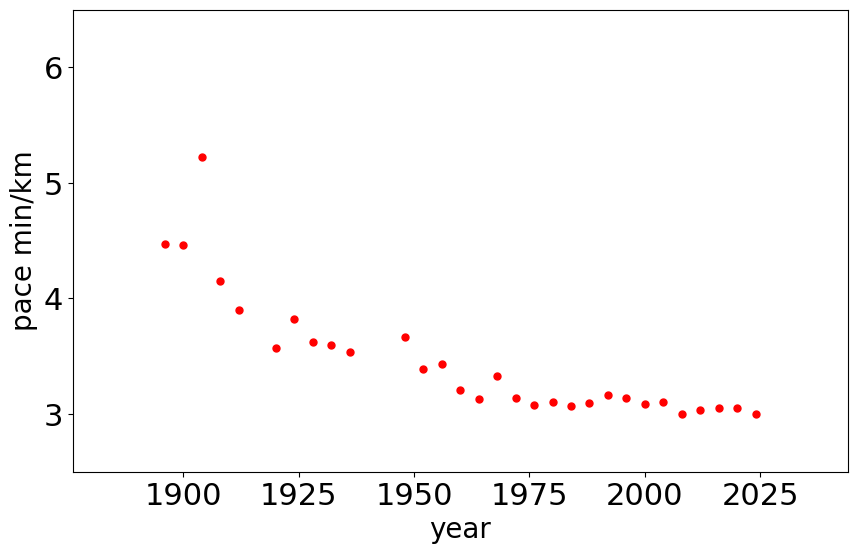

In [8]:
xlim = (1876,2044)
ylim = (2.5, 6.5)

fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
_ = ax.plot(x, y, 'r.',markersize=10)
ax.set_xlabel('year', fontsize=20)
ax.set_ylabel('pace min/km', fontsize=20)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

mlai.write_figure(filename='olympic-marathon.svg',
                  directory='./datasets')

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//datasets/olympic-marathon.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Olympic marathon pace times since 1896.</i>

Things to notice about the data include the outlier in 1904, in that
year the Olympics was in St Louis, USA. Organizational problems and
challenges with dust kicked up by the cars following the race meant that
participants got lost, and only very few participants completed. More
recent years see more consistently quick marathons.

In [9]:
import matplotlib.pyplot as plt
import notutils as nu

In [10]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
yhat = (y - offset)/scale

_ = ax.plot(x, yhat, 'r.',markersize=10)
nu.display_prediction(basis=dict(radial=mlai.radial,
                                            polynomial=mlai.polynomial,
                                            tanh=mlai.hyperbolic_tangent,
                                            fourier=mlai.fourier,
                                            relu=mlai.relu),
                                 data_limits=xlim,
                                 fig=fig, ax=ax,
                                 offset=0.,
                                 wlim = (-4., 4.),
                                 num_basis=4)

interactive(children=(Dropdown(description='basis', options={'radial': <function radial at 0x7981c82039c0>, 'p…

### Exercise 2

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/basis-functions-fitting-to-data.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/basis-functions-fitting-to-data.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Use the tool provided above to try and find the best fit you can to the
data. Explore the parameter space and give the weight values you used
for the

1.  polynomial basis
2.  Radial basis
3.  Fourier basis

Write your answers in the code box below creating a new vector of
parameters (in the correct order!) for each basis.

In [ ]:
# Write your answer to Exercise 2 here



# (a) polynomial
###### Edit these lines #####
# w_0 =
# w_1 =
# w_2 =
# w_3 =
##############################
# w_polynomial = np.asarray([[w_0], [w_1], [w_2], [w_3]])

# (b) radial
###### Edit these lines #####
# w_0 =
# w_1 =
# w_2 =
# w_3 =
##############################
# w_rbf = np.asarray([[w_0], [w_1], [w_2], [w_3]])

# (c) fourier
###### Edit these lines #####
# w_0 =
# w_1 =
# w_2 =
# w_3 =
##############################
# w_fourier = np.asarray([[w_0], [w_1], [w_2], [w_3]])



In [ ]:
np.asarray([[1, 2, 3, 4]]).shape

## Basis Function Models

$$
  f(\mathbf{ x}_i) = \sum_{j=1}^mw_j \phi_{i, j}
  $$

$$
  f(\mathbf{ x}_i) = \mathbf{ w}^\top \boldsymbol{ \phi}_i
  $$

## Log Likelihood for Basis Function Model

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/basis-functions-log-likelihood.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/basis-functions-log-likelihood.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

The likelihood of a single data point given the model parameters is
given by $$
  p\left(y_i|x_i\right)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{\left(y_i-\mathbf{ w}^{\top}\boldsymbol{ \phi}_i\right)^{2}}{2\sigma^2}\right).
  $$ and making an assumption of *conditional independence* given the
parameters we can write

to give us the likelihood for the whole data set.

## Objective Function

Traditionally in optimization, we choose to minmize an object function
(or loss function, or cost function) rather than maximizing a
likelihood. For these models we *minimize the negative log likelihood*.
This function takes the form,

$$
L(\mathbf{ w},\sigma^2)= \frac{n}{2}\log\sigma^2 + \frac{\sum_{i=1}^{n}\left(y_i-\mathbf{ w}^{\top}\boldsymbol{ \phi}_i\right)^{2}}{2\sigma^2}.
$$

To minimize this objective, we first expand the brackets as follows,

Now we pull out the vectors, $\mathbf{ w}$, to highlight that what we
have is a multivariate quadratic form in $\mathbf{ w}$.

## Design Matrices

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/basis-functions-optimisation.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/basis-functions-optimisation.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

We like to make use of *design* matrices for our data. Design matrices
involve placing the data points into rows of the matrix and data
features into the columns of the matrix. By convention, we are
referincing a vector with a bold lower case letter, and a matrix with a
bold upper case letter. The design matrix is therefore given by $$
  \boldsymbol{ \Phi}= \begin{bmatrix} \mathbf{1} & \mathbf{ x}& \mathbf{ x}^2\end{bmatrix}
  $$ so that $$
  \boldsymbol{ \Phi}\in \Re^{n\times p}.
  $$

### Multivariate Derivatives Reminder

To find the minimum of the objective function, we need to make use of
multivariate calculus. The two results we need from multivariate
calculus have the following form.
$$\frac{\text{d}\mathbf{a}^{\top}\mathbf{ w}}{\text{d}\mathbf{ w}}=\mathbf{a}$$
and
$$\frac{\text{d}\mathbf{ w}^{\top}\mathbf{A}\mathbf{ w}}{\text{d}\mathbf{ w}}=\left(\mathbf{A}+\mathbf{A}^{\top}\right)\mathbf{ w}$$
or if $\mathbf{A}$ is symmetric (*i.e.* $\mathbf{A}=\mathbf{A}^{\top}$)
$$\frac{\text{d}\mathbf{ w}^{\top}\mathbf{A}\mathbf{ w}}{\text{d}\mathbf{ w}}=2\mathbf{A}\mathbf{ w}.$$

## Differentiate

Differentiating with respect to the vector $\mathbf{ w}$ we obtain
$$\frac{\text{d} E\left(\mathbf{ w},\sigma^2 \right)}{\text{d}\mathbf{ w}}=-\frac{1}{\sigma^2} \sum_{i=1}^{n}\boldsymbol{ \phi}_iy_i+\frac{1}{\sigma^2} \left[\sum_{i=1}^{n}\boldsymbol{ \phi}_i\boldsymbol{ \phi}_i^{\top}\right]\mathbf{ w}$$
Leading to
$$\left[\sum_{i=1}^{n}\boldsymbol{ \phi}_i\boldsymbol{ \phi}_i^{\top}\right]\mathbf{ w}^{*}=\sum_{i=1}^{n}\boldsymbol{ \phi}_iy_i.$$

Rewriting this result in matrix notation we obtain: $$
\sum_{i=1}^{n}\boldsymbol{ \phi}_i\boldsymbol{ \phi}_i^\top = \boldsymbol{ \Phi}^\top \boldsymbol{ \Phi}$$
$$\sum _{i=1}^{n}\boldsymbol{ \phi}_iy_i = \boldsymbol{ \Phi}^\top \mathbf{ y}
$$

Setting the derivative to zero we obtain update equations for the
parameter vector and the noise variance. First to find $\mathbf{ w}^{*}$
we solve $$
  \left(\boldsymbol{ \Phi}^\top \boldsymbol{ \Phi}\right)  \mathbf{ w}^{*} = \boldsymbol{ \Phi}^\top \mathbf{ y}
  $$ and the update for $\left.\sigma^2\right.^*$ is $$
  \left.\sigma^2\right.^{*}=\frac{\sum_{i=1}^{n}\left(y_i-\left.\mathbf{ w}^{*}\right.^{\top}\boldsymbol{ \phi}_i\right)^{2}}{n}.
  $$

Wee should avoid solving these equations through direct use of the
inverse. Instead we solve for $\mathbf{ w}$ in the following linear
system.

$$
  \left(\boldsymbol{ \Phi}^\top \boldsymbol{ \Phi}\right)\mathbf{ w}= \boldsymbol{ \Phi}^\top \mathbf{ y}
$$ Compare this system with *solve for* $\mathbf{x}$ in $$
\mathbf{A}\mathbf{x} = \mathbf{b}.
$$ For example see the `numpy.linalg.solve` or `torch.linalg.solve`.

But the correct and more stable approach is to make use of the QR
decomposition.

We can now set up the system to solve with QR decomposition.

In [ ]:
import pandas as pd
import mlai

In [ ]:
poly_args = {'num_basis':4, # four basis: 1, x, x^2, x^3
             'data_limits':xlim}
Phi = pd.DataFrame(data = mlai.polynomial(x, **poly_args),
                   columns = [f'$x^{n}$' for n in range(poly_args['num_basis'])])

## Solution with QR Decomposition

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/qr-decomposition-regression.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/qr-decomposition-regression.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Performing a solve instead of a matrix inverse is the more numerically
stable approach, but we can do even better.

The problems can arise with very large data sets, where computing
$\boldsymbol{ \Phi}^\top \boldsymbol{ \Phi}$ can lead to a very poorly
conditioned matrix. Instead, we can compute the solution without having
to compute the matrix. The trick is to use a QR decomposition.

A [QR-decomposition](http://en.wikipedia.org/wiki/QR_decomposition) of a
matrix factorizes it into a matrix which is an orthogonal matrix
$\mathbf{Q}$, so that $\mathbf{Q}^\top \mathbf{Q} = \mathbf{I}$. And a
matrix which is upper triangular, $\mathbf{R}$. $$
\boldsymbol{ \Phi}^\top \boldsymbol{ \Phi}\boldsymbol{\beta} =
\boldsymbol{ \Phi}^\top \mathbf{ y}
$$ and we substitute $\boldsymbol{ \Phi}= \mathbf{Q}\mathbf{R}$ so we
have $$
(\mathbf{Q}\mathbf{R})^\top
(\mathbf{Q}\mathbf{R})\boldsymbol{\beta} = (\mathbf{Q}\mathbf{R})^\top
\mathbf{ y}
$$ $$
\mathbf{R}^\top (\mathbf{Q}^\top \mathbf{Q}) \mathbf{R}
\boldsymbol{\beta} = \mathbf{R}^\top \mathbf{Q}^\top \mathbf{ y}
$$

$$
\mathbf{R}^\top \mathbf{R} \boldsymbol{\beta} = \mathbf{R}^\top \mathbf{Q}^\top
\mathbf{ y}
$$ $$
\mathbf{R} \boldsymbol{\beta} = \mathbf{Q}^\top \mathbf{ y}
$$ which leaves us with a lower triangular system to solve.

This is a more numerically stable solution because it removes the need
to compute $\boldsymbol{ \Phi}^\top\boldsymbol{ \Phi}$ as an
intermediate. Computing $\boldsymbol{ \Phi}^\top\boldsymbol{ \Phi}$ is a
bad idea because it involves squaring all the elements of
$\boldsymbol{ \Phi}$ and thereby potentially reducing the numerical
precision with which we can represent the solution. Operating on
$\boldsymbol{ \Phi}$ directly preserves the numerical precision of the
model.

This can be more particularly seen when we begin to work with *basis
functions* in the next session. Some systems that can be resolved with
the QR decomposition cannot be resolved by using solve directly.

In [ ]:
import scipy as sp

In [ ]:
Q, R = np.linalg.qr(Phi)
w = sp.linalg.solve_triangular(R, Q.T@y)
w = pd.DataFrame(w, index=Phi.columns)
w

## Non-linear but Linear in the Parameters

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/non-linear-but-linear-in-parameters.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/non-linear-but-linear-in-parameters.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

One rather nice aspect of our model is that whilst it is non-linear in
the inputs, it is still linear in the parameters $\mathbf{ w}$. This
means that our derivations from before continue to operate to allow us
to work with this model. In fact, although this is a non-linear
regression it is still known as a *linear model* because it is linear in
the parameters,

$$
f(\mathbf{ x}) = \mathbf{ w}^\top \boldsymbol{ \phi}(\mathbf{ x})
$$ where the vector $\mathbf{ x}$ appears inside the basis functions,
making our result, $f(\mathbf{ x})$ non-linear in the inputs, but
$\mathbf{ w}$ appears outside our basis function, making our result
*linear* in the parameters. In practice, our basis function itself may
contain its own set of parameters, $$
f(\mathbf{ x}) = \mathbf{ w}^\top \boldsymbol{ \phi}(\mathbf{ x};
\boldsymbol{\theta}),
$$ that we’ve denoted here as $\boldsymbol{\theta}$. If these parameters
appear inside the basis function then our model is *non-linear* in these
parameters.

### Exercise 3

For the following prediction functions state whether the model is linear
in the inputs, the parameters or both.

1.  $f(x) = w_1x_1 + w_2$

2.  $f(x) = w_1\exp(x_1) + w_2x_2 + w_3$

3.  $f(x) = \log(x_1^{w_1}) + w_2x_2^2 + w_3$

4.  $f(x) = \exp(-\sum_i(x_i - w_i)^2)$

5.  $f(x) = \exp(-\mathbf{ w}^\top \mathbf{ x})$

### Exercise 3 Answer

Write your answer to Exercise 3 here

## Fitting the Model Yourself

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/basis-functions-student-fitting-exercise.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/basis-functions-student-fitting-exercise.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

You now have everything you need to fit a non- linear (in the inputs)
basis function model to the marathon data.

### Exercise 4

Choose one of the basis functions you have explored above. Compute the
design matrix on the covariates (or input data), `x`. Use the design
matrix and the response variable `y` to solve the following linear
system for the model parameters `w`. $$
\boldsymbol{ \Phi}^\top\boldsymbol{ \Phi}\mathbf{ w}= \boldsymbol{ \Phi}^\top \mathbf{ y}
$$ Compute the corresponding error on the training data. How does it
compare to the error you were able to achieve fitting the basis above?
Plot the form of your prediction function from the least squares
estimate alongside the form of you prediction function you fitted by
hand.

In [ ]:
# Write your answer to Exercise 4 here






## Polynomial Fits to Olympic Marthon Data

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/olympic-marathon-polynomial.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/olympic-marathon-polynomial.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In [ ]:
import numpy as np
import scipy as sp

Define the polynomial basis function.

In [ ]:
import mlai
import inspect
file_path = inspect.getfile(mlai.polynomial)

In [ ]:
%load -s polynomial {file_path}

Now we include the solution for the linear regression through
QR-decomposition.

In [ ]:
def basis_fit(Phi, y):
    "Use QR decomposition to fit the basis."""
    Q, R = np.linalg.qr(Phi)
    return sp.linalg.solve_triangular(R, Q.T@y)

## Linear Fit

In [ ]:
poly_args = {'num_basis':2, # two basis functions (1 and x)
             'data_limits':xlim}
Phi = mlai.polynomial(x, **poly_args)
w = basis_fit(Phi, y)

Now we make some predictions for the fit.

In [ ]:
x_pred = np.linspace(xlim[0], xlim[1], 400)[:, np.newaxis]
Phi_pred = mlai.polynomial(x_pred, **poly_args)
f_pred = Phi_pred@w

In [ ]:
import matplotlib.pyplot as plt
import mlai.plot as plot
import mlai

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
_ = ax.plot(x, y, 'r.',markersize=10)
ax.set_xlabel('year', fontsize=20)
ax.set_ylabel('pace min/km', fontsize=20)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

_ = ax.plot(x_pred, f_pred, 'b-', linewidth=2)

mlai.write_figure(filename='olympic-marathon-polynomial-2.svg',
                  directory='./ml')

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/olympic-marathon-polynomial-2.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Fit of a 1-degree polynomial (a linear model) to the Olympic
marathon data.</i>

## Cubic Fit

In [ ]:
poly_args = {'num_basis':4, # four basis: 1, x, x^2, x^3
             'data_limits':xlim}
Phi = mlai.polynomial(x, **poly_args)
w = basis_fit(Phi, y)

In [ ]:
Phi_pred = mlai.polynomial(x_pred, **poly_args)
f_pred = Phi_pred@w

In [ ]:
import matplotlib.pyplot as plt
import mlai.plot as plot
import mlai

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
_ = ax.plot(x, y, 'r.',markersize=10)
ax.set_xlabel('year', fontsize=20)
ax.set_ylabel('pace min/km', fontsize=20)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

_ = ax.plot(x_pred, f_pred, 'b-', linewidth=2)

mlai.write_figure(filename='olympic-marathon-polynomial-4.svg',
                  directory='./ml')

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/olympic-marathon-polynomial-4.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Fit of a 3-degree polynomial (a cubic model) to the Olympic
marathon data.</i>

## 9th Degree Polynomial Fit

Now we’ll try a 9th degree polynomial fit to the data.

In [ ]:
poly_args = {'num_basis':10, # basis up to x^9
             'data_limits':xlim}
Phi = mlai.polynomial(x, **poly_args)
w = basis_fit(Phi, y)

In [ ]:
Phi_pred = mlai.polynomial(x_pred, **poly_args)
f_pred = Phi_pred@w

In [ ]:
import matplotlib.pyplot as plt
import mlai.plot as plot
import mlai

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
_ = ax.plot(x, y, 'r.',markersize=10)
ax.set_xlabel('year', fontsize=20)
ax.set_ylabel('pace min/km', fontsize=20)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

_ = ax.plot(x_pred, f_pred, 'b-', linewidth=2)

mlai.write_figure(filename='olympic-marathon-polynomial-10.svg',
                  directory='./ml')

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/olympic-marathon-polynomial-10.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Fit of a 9-degree polynomial to the Olympic marathon
data.</i>

## 16th Degree Polynomial Fit

Now we’ll try a 16th degree polynomial fit to the data.

In [ ]:
poly_args = {'num_basis':17, # basis up to x^16
             'data_limits':xlim}
Phi = mlai.polynomial(x, **poly_args)
w = basis_fit(Phi, y)

In [ ]:
Phi_pred = mlai.polynomial(x_pred, **poly_args)
f_pred = Phi_pred@w

In [ ]:
import matplotlib.pyplot as plt
import mlai.plot as plot
import mlai

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
_ = ax.plot(x, y, 'r.',markersize=10)
ax.set_xlabel('year', fontsize=20)
ax.set_ylabel('pace min/km', fontsize=20)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

_ = ax.plot(x_pred, f_pred, 'b-', linewidth=2)

mlai.write_figure(filename='olympic-marathon-polynomial-17.svg',
                  directory='./ml')

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/olympic-marathon-polynomial-17.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Fit of a 16-degree polynomial to the Olympic marathon
data.</i>

## 28th Degree Polynomial Fit

Now we’ll try a 28th degree polynomial fit to the data.

In [ ]:
poly_args = {'num_basis':29, # basis up to x^28
             'data_limits':xlim}
Phi = mlai.polynomial(x, **poly_args)
w = basis_fit(Phi, y)

In [ ]:
Phi_pred = mlai.polynomial(x_pred, **poly_args)
f_pred = Phi_pred@w

In [ ]:
import matplotlib.pyplot as plt
import mlai.plot as plot
import mlai

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
_ = ax.plot(x, y, 'r.',markersize=10)
ax.set_xlabel('year', fontsize=20)
ax.set_ylabel('pace min/km', fontsize=20)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

_ = ax.plot(x_pred, f_pred, 'b-', linewidth=2)

mlai.write_figure(filename='olympic-marathon-polynomial-29.svg',
                  directory='./ml')

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/olympic-marathon-polynomial-29.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Fit of a 28-degree polynomial to the Olympic marathon
data.</i>

## Polynomial Fits to Olympic Data

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/olympic-marathon-all-polynomial.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/olympic-marathon-all-polynomial.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In [ ]:
import mlai

In [ ]:
data_limits=xlim
basis=mlai.Basis(mlai.polynomial, number=1, data_limits=xlim)

In [ ]:
import matplotlib.pyplot as plt
import mlai.plot as plot
import mlai

In [ ]:
plot.rmse_fit(x, y, param_name='number', param_range=(1, 30),
              model=mlai.LM,
              basis=basis,
              xlim=xlim, objective_ylim=[0, 0.8],
              diagrams='./ml')

In [ ]:
from ipywidgets import IntSlider

In [ ]:
import notutils as nu

In [ ]:
nu.display_plots('olympic_LM_polynomial_number{num_basis:0>3}.svg',
                            directory='./ml',
                            num_basis=IntSlider(1,1,29,1))

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/olympic_LM_polynomial_number002.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Fit of a 1 degree polynomial to the olympic marathon
data.</i>

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/olympic_LM_polynomial_number003.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Fit of a 2 degree polynomial to the olympic marathon
data.</i>

# Empirical Risk Minimisation

## Expected Loss

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/expected-loss.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/expected-loss.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Our objective function so far has been the negative log likelihood,
which we have minimized (via the sum of squares error) to obtain our
model. However, there is an alternative perspective on an objective
function, that of a *loss function*. A loss function is a cost function
associated with the penalty you might need to pay for a particular
incorrect decision. One approach to machine learning involves specifying
a loss function and considering how much a particular model is likely to
cost us across its lifetime. We can represent this with an expectation.
If our loss function is given as $L(y, x, \mathbf{ w})$ for a particular
model that predicts $y$ given $x$ and $\mathbf{ w}$ then we are
interested in minimizing the expected loss under the likely distribution
of $y$ and $x$. To understand this formally we define the *true*
distribution of the data samples, $y$, $x$. This is a particular
distribution that we don’t typically have access to. To represent it we
define a variant of the letter ‘P,’ $\mathbb{P}(y, x)$. If we genuinely
pay $L(y, x, \mathbf{ w})$ for every mistake we make, and the future
test data is genuinely drawn from $\mathbb{P}(y, x)$ then we can define
our expected loss, or risk, to be, $$
R(\mathbf{ w}) = \int L(y, x, \mathbf{ w}) \mathbb{P}(y, x) \text{d}y
\text{d}x.
$$ Of course, in practice, this value can’t be computed *but* it serves
as a reminder of what it is we are aiming to minimise and under certain
circumstances it can be approximated.

Here we have used $L(\cdot)$ as our notation for the *loss* function.
The cost we expect to pay for making errors. This is a different
interpretation of the objective function, $E(\cdot)$, fromt he idea of
negative log likelihood we see in Gauss’s probabilistic approach.

## Sample-Based Approximations

A sample-based approximation to an expectation involves replacing the
true expectation with a sum over samples from the distribution. $$
\int f(z) p(z) \text{d}z\approx \frac{1}{s}\sum_{i=1}^s f(z_i).
$$ if $\{z_i\}_{i=1}^s$ are a set of $s$ independent and identically
distributed samples from the distribution $p(z)$. This approximation
becomes better for larger $s$, although the *rate of convergence* to the
true integral will be very dependent on the distribution $p(z)$ *and*
the function $f(z)$.

That said, this means we can approximate our true integral with the sum,
$$
R(\mathbf{ w}) \approx \frac{1}{n}\sum_{i=1}^{n} L(y_i, x_i, \mathbf{ w}).
$$

if $y_i$ and $x_i$ are independent samples from the true distribution
$\mathbb{P}(y, x)$. Minimizing this sum directly is known as *empirical
risk minimization*. The sum of squares error we have been using can be
recovered for this case by considering a *squared loss*, $$
L(y, x, \mathbf{ w}) = (y-\mathbf{ w}^\top\boldsymbol{\phi}(x))^2,
$$ which gives an empirical risk of the form $$
R(\mathbf{ w}) \approx \frac{1}{n} \sum_{i=1}^{n}
(y_i - \mathbf{ w}^\top \boldsymbol{\phi}(x_i))^2
$$ which up to the constant $\frac{1}{n}$ is identical to the objective
function we have been using so far.

## Estimating Risk through Validation

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/empirical-risk-minimization.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/empirical-risk-minimization.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Unfortuantely, minimising the empirial risk only guarantees something
about our performance on the training data. If we don’t have enough data
for the approximation to the risk to be valid, then we can end up
performing significantly worse on test data. Fortunately, we can also
estimate the risk for test data through estimating the risk for unseen
data. The main trick here is to ‘hold out’ a portion of our data from
training and use the models performance on that sub-set of the data as a
proxy for the true risk. This data is known as ‘validation’ data. It
contrasts with test data, because its values are known at the model
design time. However, in contrast to test date we don’t use it to fit
our model. This means that it doesn’t exhibit the same bias that the
empirical risk does when estimating the true risk.

## Validation

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/validation-short-intro.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/validation-short-intro.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Next we will explore techniques for model selection that make use of
validation data. Data that isn’t seen by the model in the learning (or
fitting) phase, but is used to *validate* our choice of model from
amoungst the different designs we have selected.

In machine learning, we are looking to minimise the value of our
objective function $E$ with respect to its parameters $\mathbf{ w}$. We
do this by considering our training data. We minimize the value of the
objective function as it’s observed at each training point. However we
are really interested in how the model will perform on future data. For
evaluating that we choose to *hold out* a portion of the data for
evaluating the quality of the model.

We will review the different methods of model selection on the Olympics
marathon data.

## Validation on the Olympic Marathon Data

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/olympic-marathon-validation-fit.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/olympic-marathon-validation-fit.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

The first thing we’ll do is fit a standard linear model to the data. We
recall from previous lectures and lab classes that to do this we need to
solve the system $$
\boldsymbol{ \Phi}^\top \boldsymbol{ \Phi}\mathbf{ w}= \boldsymbol{ \Phi}^\top \mathbf{ y}
$$ for $\mathbf{ w}$ and use the resulting vector to make predictions at
the training points and test points, $$
\mathbf{ f}= \boldsymbol{ \Phi}\mathbf{ w}.
$$ The prediction function can be used to compute the objective
function, $$
E(\mathbf{ w}) = \sum_{i}^{n} (y_i - \mathbf{ w}^\top\phi(\mathbf{ y}_i))^2
$$ by substituting in the prediction in vector form we have $$
E(\mathbf{ w}) =  (\mathbf{ y}- \mathbf{ f})^\top(\mathbf{ y}- \mathbf{ f})
$$

### Exercise 5

In this question you will construct some flexible general code for
fitting linear models.

Create a python function that computes $\boldsymbol{ \Phi}$ for the
linear basis,
$$\boldsymbol{ \Phi}= \begin{bmatrix} \mathbf{ y}& \mathbf{1}\end{bmatrix}$$
Name your function `linear`. `Phi` should be in the form of a *design
matrix* and `x` should be in the form of a `numpy` two dimensional array
with $n$ rows and 1 column Calls to your function should be in the
following form:

`Phi = linear(x)`

Create a python function that accepts, as arguments, a python function
that defines a basis (like the one you’ve just created called `linear`)
as well as a set of inputs and a vector of parameters. Your new python
function should return a prediction. Name your function `prediction`.
The return value `f` should be a two dimensional `numpy` array with $n$
rows and $1$ column, where $n$ is the number of data points. Calls to
your function should be in the following form:

`f = prediction(w, x, linear)`

Create a python function that computes the sum of squares objective
function (or error function). It should accept your input data (or
covariates) and target data (or response variables) and your parameter
vector `w` as arguments. It should also accept a python function that
represents the basis. Calls to your function should be in the following
form:

`e = objective(w, x, y, linear)`

Create a function that solves the linear system for the set of
parameters that minimizes the sum of squares objective. It should accept
input data, target data and a python function for the basis as the
inputs. Calls to your function should be in the following form:

`w = fit(x, y, linear)`

Fit a linear model to the olympic data using these functions and plot
the resulting prediction between 1890 and 2020. Set the title of the
plot to be the error of the fit on the *training data*.

In [ ]:
# Write your answer to Exercise 5 here






## Polynomial Fit: Training Error

### Exercise 6

In this question we extend the code above to a non- linear basis (a
quadratic function).

Start by creating a python-function called `quadratic`. It should
compute the quadratic basis. $$
\boldsymbol{ \Phi}= \begin{bmatrix} \mathbf{1} & \mathbf{ y}& \mathbf{ y}^2\end{bmatrix}
$$ It should be called in the following form:

`Phi = quadratic(x)`

Use this to compute the quadratic fit for the model, again plotting the
result titled by the error.

In [ ]:
# Write your answer to Exercise 6 here






## Polynomial Fits to Olympics Data

In [ ]:
import pods
import mlai

In [ ]:
max_basis = 28
data_limits = xlim
basis = mlai.Basis(mlai.polynomial, number=1, data_limits=data_limits)
num_data = x.shape[0]

In [ ]:
import mlai.plot as plot

In [ ]:
plot.rmse_fit(x, y, param_name='number', param_range=(1, max_basis+1),
              model=mlai.LM, basis=basis,
              xlim=data_limits, objective_ylim=[0, 0.8],
              diagrams='./ml')

In [ ]:
from ipywidgets import IntSlider

In [ ]:
import notutils as nu

In [ ]:
nu.display_plots('olympic_LM_polynomial_number{num_basis:0>3}.svg',
                            directory='./ml',
                            num_basis=IntSlider(1, 1, max_basis, 1))

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/olympic_LM_polynomial_number028.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Polynomial fit to olympic data with 28 basis functions.</i>

## Hold Out Validation on Olympic Marathon Data

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/olympic-marathon-hold-out-validation.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/olympic-marathon-hold-out-validation.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In [11]:
import mlai

In [12]:
data_limits=xlim
basis = mlai.Basis(mlai.polynomial, number=1, data_limits=data_limits)
max_basis = 11

In [13]:
import mlai.plot as plot

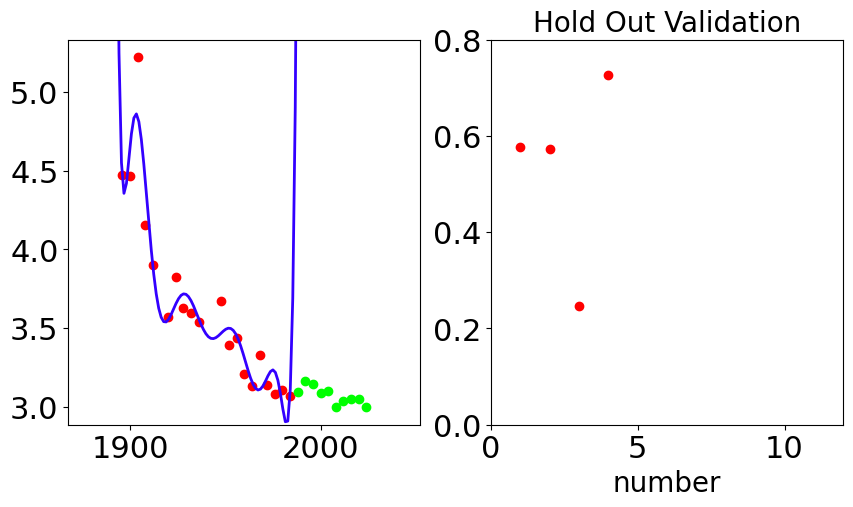

In [14]:
plot.holdout_fit(x, y, param_name='number',
                 param_range=(1, max_basis+1),
                 model=mlai.LM, basis=basis,
                 permute=False, objective_ylim=[0, 0.8],
                 xlim=data_limits, prefix='olympic_val_extra',
                 diagrams='./ml')

In [15]:
import notutils as nu
from ipywidgets import IntSlider

In [16]:
import notutils as nu

In [17]:
nu.display_plots('olympic_val_extra_LM_polynomial_number{num_basis:0>3}.svg',
                            directory='./ml',
                            num_basis=IntSlider(1, 1, max_basis, 1))

interactive(children=(IntSlider(value=1, description='num_basis', max=11, min=1), Output()), _dom_classes=('wi…

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/olympic_val_extra_LM_polynomial_number011.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Olympic marathon data with validation error for
extrapolation.</i>

## Extrapolation

## Interpolation

In [ ]:
import mlai.plot as plot

In [ ]:
plot.holdout_fit(x, y, param_name='number', param_range=(1, max_basis+1),
                 model=mlai.LM, basis=basis,
                 xlim=data_limits, prefix='olympic_val_inter',
                 objective_ylim=[0.1, 0.6], permute=True,
                 diagrams='./ml')

In [ ]:
import notutils as nu
from ipywidgets import IntSlider

In [ ]:
import notutils as nu

In [ ]:
nu.display_plots('olympic_val_inter_LM_polynomial_number{num_basis:0>3}.svg',
                            directory='./ml',
                            num_basis=IntSlider(1, 1, max_basis, 1))

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/olympic_val_inter_LM_polynomial_number011.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Olympic marathon data with validation error for
interpolation.</i>

## Choice of Validation Set

## Hold Out Data

You have a conclusion as to which model fits best under the training
error, but how do the two models perform in terms of validation? In this
section we consider *hold out* validation. In hold out validation we
remove a portion of the training data for *validating* the model on. The
remaining data is used for fitting the model (training). Because this is
a time series prediction, it makes sense for us to hold out data at the
end of the time series. This means that we are validating on future
predictions. We will hold out data from after 1980 and fit the model to
the data before 1980.

In [ ]:
# select indices of data to 'hold out'
indices_hold_out = np.flatnonzero(x>1980)

# Create a training set
x_train = np.delete(x, indices_hold_out, axis=0)
y_train = np.delete(y, indices_hold_out, axis=0)

# Create a hold out set
x_valid = np.take(x, indices_hold_out, axis=0)
y_valid = np.take(y, indices_hold_out, axis=0)

### Exercise 7

For both the linear and quadratic models, fit the model to the data up
until 1980 and then compute the error on the held out data (from 1980
onwards). Which model performs better on the validation data?

In [ ]:
# Write your answer to Exercise 7 here






## Richer Basis Set

Now we have an approach for deciding which model to retain, we can
consider the entire family of polynomial bases, with arbitrary degrees.

### Exercise 8

Now we are going to build a more sophisticated form of basis function,
one that can accept arguments to its inputs (similar to those we used in
[this lab](./week4.ipynb)). Here we will start with a polynomial basis.

    def polynomial(x, degree, loc, scale):
        degrees =np.arange(degree+1)
        return ((x-loc)/scale)**degrees

The basis as we’ve defined it has three arguments as well as the input.
The degree of the polynomial, the scale of the polynomial and the
offset. These arguments need to be passed to the basis functions
whenever they are called. Modify your code to pass these additional
arguments to the python function for creating the basis. Do this for
each of your functions `predict`, `fit` and `objective`. You will find
`*args` (or `**kwargs`) useful.

Write code that tries to fit different models to the data with
polynomial basis. Use a maximum degree for your basis from 0 to 17. For
each polynomial store the *hold out validation error* and the *training
error*. When you have finished the computation plot the hold out error
for your models and the training error for your p. When computing your
polynomial basis use `offset=1956.` and `scale=120.` to ensure that the
data is mapped (roughly) to the -1, 1 range.

Which polynomial has the minimum training error? Which polynomial has
the minimum validation error?

In [ ]:
# Write your answer to Exercise 8 here






## Leave One Out Validation

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/olympic-marathon-loo-validation.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/olympic-marathon-loo-validation.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In [ ]:
import mlai

In [ ]:
data_limits=xlim
basis = mlai.Basis(mlai.polynomial, number=1, data_limits=data_limits)
max_basis = 11

In [ ]:
import mlai.plot as plot

In [ ]:
# The leave one out cross validation can be slow to run, so here it's commented.
#plot.loo_fit(x, y, param_name='number', param_range=(1, max_basis+1),
#             model=mlai.LM, basis=basis,
#             xlim=data_limits, objective_ylim=[0, 0.8], prefix='olympic_loo',
#            diagrams='./ml')

In [ ]:
from ipywidgets import IntSlider
import pods

In [ ]:
import notutils as nu

In [ ]:
nu.display_plots('olympic_loo{part:0>3}_LM_polynomial_number{num_basis:0>3}.svg',
                            directory='./ml',
                            num_basis=IntSlider(1, 1, max_basis, 1),
                            part=IntSlider(0, 0, x.shape[0], 1))

Hold out validation uses a portion of the data to hold out and a portion
of the data to train on. There is always a compromise between how much
data to hold out and how much data to train on. The more data you hold
out, the better the estimate of your performance at ‘run-time’ (when the
model is used to make predictions in real applications). However, by
holding out more data, you leave less data to train on, so you have a
better validation, but a poorer quality model fit than you could have
had if you’d used all the data for training. Leave one out cross
validation leaves as much data in the training phase as possible: you
only take *one point* out for your validation set. However, if you do
this for hold-out validation, then the quality of your validation error
is very poor because you are testing the model quality on one point
only. In *cross validation* the approach is to improve this estimate by
doing more than one model fit. In *leave one out cross validation* you
fit $n$ different models, where $n$ is the number of your data. For each
model fit you take out one data point, and train the model on the
remaining $n-1$ data points. You validate the model on the data point
you’ve held out, but you do this $n$ times, once for each different
model. You then take the *average* of all the $n$ badly estimated hold
out validation errors. The average of this estimate is a good estimate
of performance of those models on the test data.

### Exercise 9

Write code that computes the *leave one out* validation error for the
olympic data and the polynomial basis. Use the functions you have
created above: `objective`, `fit`, `polynomial`. Compute the
*leave-one-out* cross validation error for basis functions containing a
maximum degree from 0 to 17.

In [ ]:
# Write your answer to Exercise 9 here






## $k$-fold Cross Validation

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/olympic-marathon-k-fold-validation.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/olympic-marathon-k-fold-validation.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In [ ]:
import mlai

In [ ]:
data_limits=xlim
basis = mlai.Basis(mlai.polynomial, number=1, data_limits=data_limits)
max_basis = 11

In [ ]:
import mlai.plot as plot

In [ ]:
num_parts=5 # set k
plot.cv_fit(x, y, param_name='number',
            param_range=(1, max_basis+1),
            model=mlai.LM,
            basis=basis,
            xlim=data_limits,
            objective_ylim=[0.2,0.6],
            num_parts=num_parts,
            diagrams='./ml')

In [ ]:
from ipywidgets import IntSlider
import pods

In [ ]:
import notutils as nu

In [ ]:
nu.display_plots('olympic_{num_parts}'.format(num_parts=num_parts) + 'cv{part:0>2}_LM_polynomial_number{number:0>3}.svg',
                            directory='./ml',
                            part=IntSlider(0,0,5,1),
                            number=IntSlider(1, 1, max_basis, 1))

Leave one out cross validation produces a very good estimate of the
performance at test time, and is particularly useful if you don’t have a
lot of data. In these cases you need to make as much use of your data
for model fitting as possible, and having a large hold out data set (to
validate model performance) can have a significant effect on the size of
the data set you have to fit your model, and correspondingly, the
complexity of the model you can fit. However, leave one out cross
validation involves fitting $n$ models, where $n$ is your number of
training data. For the olympics example, this is only 27 model fits, but
in practice many data sets consist thousands or millions of data points,
and fitting many millions of models for estimating validation error
isn’t really practical. One option is to return to *hold out*
validation, but another approach is to perform $k$-fold cross
validation. In $k$-fold cross validation you split your data into $k$
parts. Then you use $k-1$ of those parts for training, and hold out one
part for validation. Just like we did for the hold out validation above.
In *cross* validation, however, you repeat this process. You swap the
part of the data you just used for validation back in to the training
set and select another part for validation. You then fit the model to
the new training data and validate on the portion of data you’ve just
extracted. Each split of training/validation data is called a *fold* and
since you do this process $k$ times, the procedure is known as $k$-fold
cross validation. The term *cross* refers to the fact that you cross
over your validation portion back into the training data every time you
perform a fold.

### Exercise 10

Perform $k$-fold cross validation on the olympic data with your
polynomial basis. Use $k$ set to 5 (e.g. five fold cross validation). Do
the different forms of validation select different models? Does five
fold cross validation always select the same model?

*Note*: The data doesn’t divide into 5 equal size partitions for the
five fold cross validation error. Don’t worry about this too much. Two
of the partitions will have an extra data point. You might find
`np.random.permutation?` useful.

In [ ]:
# Write your answer to Exercise 10 here






Notice how as we vary the “part” of the cross validation, the fit
varies. This variation is greater for high degree polynomials than for
small degree polynomials like linear and quadratic models. This
variation is coming from different variations of the data set.

An explicit approach to assessing this variations is to use “bootstrap
sampling.”

## The Bootstrap

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/the-bootstrap.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/the-bootstrap.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Bootstrap sampling (Efron, 1979) is an approach to assessing the
sensitivity of the model to different variations on a data set. In an
ideal world, we’d like to be able to look at different realisations from
the original data generating distribution $\mathbb{P}(y, \mathbf{ x})$,
but this is not available to us.

In bootstrap sampling, we take the sample we have, $$
\mathbf{ y}, \mathbf{X}\sim \mathbb{P}(y, \mathbf{ x})
$$ and resample from that data, rather than from the true distribution.
So, we have a new data set, $\hat{\mathbf{ y}}$, $\hat{\mathbf{X}}$
which is sampled from the original *with* replacement.

In [ ]:
import numpy as np

In [ ]:
def bootstrap(X):
    "Return a bootstrap sample from a data set."
    n = X.shape[0]
    ind = np.random.choice(n, n, replace=True) # Sample randomly with replacement.
    return X[ind, :]

## Bootstrap and Olympic Marathon Data

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/olympic-marathon-bootstrap-polynomial.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/olympic-marathon-bootstrap-polynomial.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

First we define a function to bootstrap resample our dataset.

In [ ]:
import numpy as np

In [ ]:
def bootstrap(X, y):
    "Return a bootstrap sample from a data set."
    n = X.shape[0]
    ind = np.random.choice(n, n, replace=True) # Sample randomly with replacement.
    return X[ind, :], y[ind, :]

In [ ]:
num_bootstraps = 10

In [ ]:
def bootstrap_fit(Phi, y, size):
    W = np.zeros((Phi.shape[1], size))
    for i in range(size):
        Phi_hat, y_hat = bootstrap(Phi, y)
        W[:, i:i+1] = basis_fit(Phi_hat, y_hat)
    return W

## Linear Fit

In [ ]:
poly_args = {'num_basis':2, # two basis functions (1 and x)
             'data_limits':xlim}
Phi = mlai.polynomial(x, **poly_args)
W_hat = bootstrap_fit(Phi, y, num_bootstraps)

Now we make some predictions for the fit.

In [ ]:
x_pred = np.linspace(xlim[0], xlim[1], 400)[:, np.newaxis]
Phi_pred = mlai.polynomial(x_pred, **poly_args)
f_pred = Phi_pred@W_hat

In [ ]:
import matplotlib.pyplot as plt
import mlai.plot as plot
import mlai

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
_ = ax.plot(x, y, 'r.',markersize=10)
ax.set_xlabel('year', fontsize=20)
ax.set_ylabel('pace min/km', fontsize=20)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

_ = ax.plot(x_pred, f_pred, 'b-', linewidth=2)

mlai.write_figure(filename='olympic-marathon-bootstrap-polynomial-2.svg',
                  directory='./ml')

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/olympic-marathon-bootstrap-polynomial-2.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Fit of a 1 degree polynomial (a linear model) to the olympic
marathon data.</i>

## Cubic Fit

In [ ]:
poly_args = {'num_basis':4, # four basis: 1, x, x^2, x^3
             'data_limits':xlim}
Phi = mlai.polynomial(x, **poly_args)
W_hat = bootstrap_fit(Phi, y, num_bootstraps)

In [ ]:
Phi_pred = mlai.polynomial(x_pred, **poly_args)
f_pred = Phi_pred@W_hat

In [ ]:
import matplotlib.pyplot as plt
import mlai.plot as plot
import mlai

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
_ = ax.plot(x, y, 'r.',markersize=10)
ax.set_xlabel('year', fontsize=20)
ax.set_ylabel('pace min/km', fontsize=20)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

_ = ax.plot(x_pred, f_pred, 'b-', linewidth=2)

mlai.write_figure(filename='olympic-marathon-bootstrap-polynomial-4.svg',
                  directory='./ml')

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/olympic-marathon-bootstrap-polynomial-4.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Fit of a 3 degree polynomial (a cubic model) to the olympic
marathon data.</i>

## 9th Degree Polynomial Fit

Now we’ll try a 9th degree polynomial fit to the data.

In [ ]:
poly_args = {'num_basis':10, # basis up to x^9
             'data_limits':xlim}
Phi = mlai.polynomial(x, **poly_args)
W_hat = bootstrap_fit(Phi, y, num_bootstraps)

In [ ]:
Phi_pred = mlai.polynomial(x_pred, **poly_args)
f_pred = Phi_pred@W_hat

In [ ]:
import matplotlib.pyplot as plt
import mlai.plot as plot
import mlai

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
_ = ax.plot(x, y, 'r.',markersize=10)
ax.set_xlabel('year', fontsize=20)
ax.set_ylabel('pace min/km', fontsize=20)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

_ = ax.plot(x_pred, f_pred, 'b-', linewidth=2)

mlai.write_figure(filename='olympic-marathon-bootstrap-polynomial-10.svg',
                  directory='./ml')

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/olympic-marathon-bootstrap-polynomial-10.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Fit of a 9 degree polynomial to the olympic marathon
data.</i>

## 16th Degree Polynomial Fit

Now we’ll try a 16th degree polynomial fit to the data.

In [ ]:
poly_args = {'num_basis':17, # basis up to x^16
             'data_limits':xlim}
Phi = mlai.polynomial(x, **poly_args)
W_hat = bootstrap_fit(Phi, y, num_bootstraps)

In [ ]:
Phi_pred = mlai.polynomial(x_pred, **poly_args)
f_pred = Phi_pred@W_hat

In [ ]:
import matplotlib.pyplot as plt
import mlai.plot as plot
import mlai

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
_ = ax.plot(x, y, 'r.',markersize=10)
ax.set_xlabel('year', fontsize=20)
ax.set_ylabel('pace min/km', fontsize=20)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

_ = ax.plot(x_pred, f_pred, 'b-', linewidth=2)

mlai.write_figure(filename='olympic-marathon-bootstrap-polynomial-17.svg',
                  directory='./ml')

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/olympic-marathon-bootstrap-polynomial-17.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Fit of a 16 degree polynomial to the olympic marathon
data.</i>

## Bootstrap Confidence Intervals

We can also use the bootstrap to create confidence intervals for our
predictions, showing the uncertainty in our model.

In [ ]:
def plot_polynomial_bootstrap_confidence(x, y, x_pred, degree=3, num_bootstraps=50):
    """Plot bootstrap confidence intervals for polynomial fit.

    :param x: training inputs
    :param y: training outputs
    :param x_pred: prediction points
    :param degree: polynomial degree
    :param num_bootstraps: number of bootstrap samples
    """
    poly_args = {'num_basis': degree + 1, 'data_limits': xlim}
    Phi = mlai.polynomial(x, **poly_args)
    W_hat = bootstrap_fit(Phi, y, num_bootstraps)

    Phi_pred = mlai.polynomial(x_pred, **poly_args)
    f_pred_bootstrap = Phi_pred @ W_hat  # Shape: (n_pred_points, n_bootstrap_samples)

    # Transpose to get shape (n_bootstrap_samples, n_pred_points)
    f_pred_bootstrap = f_pred_bootstrap.T

    # Compute confidence intervals
    f_mean = np.mean(f_pred_bootstrap, axis=0)  # Mean across bootstrap samples
    f_std = np.std(f_pred_bootstrap, axis=0)    # Std across bootstrap samples

    # Ensure all arrays have the right shape
    if f_mean.ndim > 1:
        f_mean = f_mean.flatten()
    if f_std.ndim > 1:
        f_std = f_std.flatten()

    f_lower = f_mean - 1.96 * f_std  # 95% confidence interval
    f_upper = f_mean + 1.96 * f_std

    return f_mean, f_lower, f_upper, f_pred_bootstrap

In [ ]:
f_mean, f_lower, f_upper, f_pred_bootstrap = plot_polynomial_bootstrap_confidence(x, y, x_pred, degree=3)

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)

# Plot training data
ax.plot(x, y, 'r.', markersize=10, label='Training Data')

# Plot mean prediction
ax.plot(x_pred.flatten(), f_mean, 'b-', linewidth=2, label='Mean Prediction')

# Plot confidence interval
ax.fill_between(x_pred.flatten(), f_lower, f_upper,
                alpha=0.3, color='blue', label='95% Confidence Interval')

# Plot some individual bootstrap fits
for i in range(0, num_bootstraps, 5):  # Show every 5th bootstrap fit
    ax.plot(x_pred.flatten(), f_pred_bootstrap[i, :].flatten(), 'g-', alpha=0.1, linewidth=1)

ax.set_xlabel('year', fontsize=20)
ax.set_ylabel('pace min/km', fontsize=20)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.legend(fontsize=16)
ax.set_title('Bootstrap Confidence Intervals for Cubic Polynomial', fontsize=20)

mlai.write_figure(filename='olympic-marathon-bootstrap-confidence.svg',
                  directory='./ml')

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/olympic-marathon-bootstrap-confidence.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Bootstrap confidence intervals for a cubic polynomial fit to
Olympic marathon data. The shaded region shows the 95% confidence
interval, and individual bootstrap fits are shown in light green.</i>

The confidence intervals show the uncertainty in our predictions. The
width of the confidence interval reflects the variance of the model -
wider intervals indicate higher variance. This visualization helps us
understand not just the point predictions but also the reliability of
those predictions.

The bootstrap method provides a powerful way to estimate bias and
variance without needing to know the true underlying function. By
resampling from our training data, we can approximate how our model
would perform on different samples from the same distribution, giving us
insights into the bias-variance tradeoff.

This analysis is particularly valuable for model selection - we can
choose the polynomial degree that minimizes the total error (bias +
variance) rather than just the training error.

## Bias Variance Decomposition

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/bias-variance-dilemma.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/bias-variance-dilemma.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

One of Breiman’s ideas for improving predictive performance is known as
bagging (Breiman, 1996). The idea is to train a number of models on the
data such that they overfit (high variance). Then average the
predictions of these models. The models are trained on different
bootstrap samples (Efron, 1979) and their predictions are aggregated
giving us the acronym, Bagging. By combining decision trees with
bagging, we recover random forests (Breiman, 2001).

Bias and variance can also be estimated through Efron’s bootstrap
(Efron, 1979), and the traditional view has been that there’s a form of
Goldilocks effect, where the best predictions are given by the model
that is ‘just right’ for the amount of data available. Not to simple,
not too complex. The idea is that bias decreases with increasing model
complexity and variance increases with increasing model complexity.
Typically plots begin with the Mummy bear on the left (too much bias)
end with the Daddy bear on the right (too much variance) and show a dip
in the middle where the Baby bear (just) right finds themselves.

The Daddy bear is typically positioned at the point where the model can
exactly interpolate the data. For a generalized linear model (McCullagh
and Nelder, 1989), this is the point at which the number of parameters
is equal to the number of data[1].

The bias-variance decomposition (Geman et al., 1992) considers the
expected test error for different variations of the *training data*
sampled from, $\mathbb{P}(\mathbf{ x}, y)$ $$\begin{align*}
R(\mathbf{ w}) = & \int \left(y- f^*(\mathbf{ x})\right)^2 \mathbb{P}(y, \mathbf{ x}) \text{d}y\text{d}\mathbf{ x}\\
& \triangleq \mathbb{E}\left[ \left(y- f^*(\mathbf{ x})\right)^2 \right].
\end{align*}$$

This can be decomposed into two parts, $$
\begin{align*}
\mathbb{E}\left[ \left(y- f(\mathbf{ x})\right)^2 \right] = & \text{bias}\left[f^*(\mathbf{ x})\right]^2  + \text{variance}\left[f^*(\mathbf{ x})\right]  +\sigma^2,
\end{align*}
$$ where the bias is given by $$
  \text{bias}\left[f^*(\mathbf{ x})\right] =
\mathbb{E}\left[f^*(\mathbf{ x})\right] - f(\mathbf{ x})
$$ and it summarizes error that arises from the model’s inability to
represent the underlying complexity of the data. For example, if we were
to model the marathon pace of the winning runner from the Olympics by
computing the average pace across time, then that model would exhibit
*bias* error because the reality of Olympic marathon pace is it is
changing (typically getting faster).

The variance term is given by $$
  \text{variance}\left[f^*(\mathbf{ x})\right] = \mathbb{E}\left[\left(f^*(\mathbf{ x}) - \mathbb{E}\left[f^*(\mathbf{ x})\right]\right)^2\right].
  $$ The variance term is often described as arising from a model that
is too complex, but we must be careful with this idea. Is the model
really too complex relative to the real world that generates the data?
The real world is a complex place, and it is rare that we are
constructing mathematical models that are more complex than the world
around us. Rather, the ‘too complex’ refers to ability to estimate the
parameters of the model given the data we have. Slight variations in the
training set cause changes in prediction.

Models that exhibit high variance are sometimes said to ‘overfit’ the
data whereas models that exhibit high bias are sometimes described as
‘underfitting’ the data.

We can also use the bootstrap to characterise the bias and variance area
for different polynomials on the olympic data.

[1] Assuming we are ignoring parameters in the link function and the
distribution function.

## Bias-Variance Analysis for Olympic Marathon Data

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/olympic-marathon-bias-variance-plots.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/olympic-marathon-bias-variance-plots.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

We can use the bootstrap to characterise the bias and variance for
different polynomials on the olympic data. The bootstrap allows us to
estimate how much the model predictions vary when trained on different
samples from the same underlying distribution.

For each polynomial degree, we compute the bias and variance by
comparing the bootstrap predictions at the training inputs against the
observed targets. Concretely, we average the bootstrap predictions per
training input and measure squared error to the observed $y$ (bias$^2$),
and we average the bootstrap prediction variance across training inputs
(variance). This non-OOB bootstrap estimate exhibits the expected
pattern: high bias for low-degree polynomials and higher variance for
high-degree polynomials.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mlai.plot as plot
import mlai

In [ ]:
def compute_bias_variance(x_pred, f_pred_bootstrap, f_full_dataset):
    """Compute bias and variance from bootstrap predictions.

    :param x_pred: prediction points
    :param f_pred_bootstrap: bootstrap predictions (n_bootstrap, n_points)
    :param f_full_dataset: prediction from full dataset
    """
    # Mean prediction across bootstrap samples
    f_mean = np.mean(f_pred_bootstrap, axis=0)

    # Ensure f_mean has the right shape (flatten if needed)
    if f_mean.ndim > 1:
        f_mean = f_mean.flatten()
    if f_full_dataset.ndim > 1:
        f_full_dataset = f_full_dataset.flatten()

    # Bias: difference between mean bootstrap prediction and full dataset prediction
    bias = np.mean((f_mean - f_full_dataset)**2)

    # Variance: average variance of bootstrap predictions around their mean
    variance = np.mean(np.var(f_pred_bootstrap, axis=0))

    return bias, variance, f_mean

In [ ]:
def analyze_polynomial_bias_variance(x, y, x_pred, max_degree=6, num_bootstraps=50):
    """Analyze bias-variance tradeoff for polynomial models.

    :param x: training inputs
    :param y: training outputs
    :param x_pred: prediction points
    :param max_degree: maximum polynomial degree to test
    :param num_bootstraps: number of bootstrap samples
    """
    degrees = range(1, max_degree + 1)
    biases = []
    variances = []
    total_errors = []

    for degree in degrees:
        # Bootstrap predictions for this degree
        poly_args = {'num_basis': degree + 1, 'data_limits': xlim}
        Phi = mlai.polynomial(x, **poly_args)
        W_hat = bootstrap_fit(Phi, y, num_bootstraps)

        # Predictions at training inputs for each bootstrap model
        # Phi: (n_train, n_basis), W_hat: (n_basis, B) -> (n_train, B)
        F_train = (Phi @ W_hat).T  # (B, n_train)

        # Per-point bootstrap mean and variance of predictions
        mu = F_train.mean(axis=0)            # (n_train,)
        var_point = F_train.var(axis=0)      # (n_train,)

        # Bias^2 and Variance using observed targets as reference
        bias = np.mean((mu - y.flatten())**2)
        variance = np.mean(var_point)

        biases.append(bias)
        variances.append(variance)
        total_errors.append(bias + variance)

    return degrees, biases, variances, total_errors

In [ ]:
degrees, biases, variances, total_errors = analyze_polynomial_bias_variance(x, y, x_pred)

In [ ]:
import matplotlib.pyplot as plt
import mlai.plot as plot
import mlai

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)

ax.plot(degrees, biases, 'b-', linewidth=2, label='Bias$^2$')
ax.plot(degrees, variances, 'r-', linewidth=2, label='Variance')
ax.plot(degrees, total_errors, 'g-', linewidth=2, label='Total Error')

ylim = [0, 1]
ax.set_ylim(ylim)
ax.set_xlabel('Polynomial Degree', fontsize=20)
ax.set_ylabel('Error', fontsize=20)
ax.set_title('Bias-Variance Tradeoff for Olympic Marathon Data', fontsize=20)
ax.legend(fontsize=16)
ax.grid(True, alpha=0.3)

# Mark the optimal point
optimal_idx = np.argmin(total_errors)
ax.axvline(x=degrees[optimal_idx], color='k', linestyle='--', alpha=0.7)
ax.text(degrees[optimal_idx] + 0.5, ylim[1] * 0.8,
        f'Optimal: degree {degrees[optimal_idx]}', fontsize=14)

mlai.write_figure(filename='olympic-marathon-bias-variance-plots.svg',
                  directory='./ml')

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/olympic-marathon-bias-variance-plots.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Bias-variance tradeoff for polynomial models on Olympic
marathon data. The bias decreases with model complexity while variance
increases. The optimal model balances these two sources of error.</i>

The plot shows the classic bias-variance tradeoff. As we increase the
polynomial degree:

1.  **Bias decreases**: Higher degree polynomials can capture more
    complex patterns in the data
2.  **Variance increases**: Higher degree polynomials are more sensitive
    to variations in the training data
3.  **Total error**: The sum of bias and variance shows a U-shaped curve
    with an optimal point

The optimal polynomial degree (around 3-4 in this case) minimizes the
total generalization error by balancing bias and variance.

This analysis demonstrates the “Goldilocks principle” in machine
learning - we want a model that’s not too simple (high bias) and not too
complex (high variance), but just right for the amount of data we have.

## No Free Lunch Theorem

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/no-free-lunch-theorem.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/no-free-lunch-theorem.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Also related on generalisation error is the so called ‘no free lunch
theorem,’ which refers to our inability to decide what a better learning
algorithm is without making assumptions about the data (Wolpert, 1996)
(see also Wolpert (2002)).

NFL results show that without constraints on the data-generating
distribution, no learning algorithm outperforms another in expectation.
Any advantage derives from aligning the learner’s inductive bias with
the structure present in the data.

We’ve seen how model complexity trades bias for variance and how
resampling quantifies variability. NFL explains why there is no globally
optimal choice: effective generalisation requires assumptions tailored
to the task (basis choice, degree, smoothness, priors).

## Regularisation

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/linear-regression-regularisation.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/linear-regression-regularisation.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

The solution to the linear system is given by solving, $$
\boldsymbol{ \Phi}^\top\boldsymbol{ \Phi}\mathbf{ w}= \boldsymbol{ \Phi}^\top\mathbf{ y}
$$ for $\mathbf{ w}$.

But if $\boldsymbol{ \Phi}^\top\boldsymbol{ \Phi}$ is not full rank,
this system cannot be solved. This is reflective of an *underdetermined
system* of equations. There are *infinite* solutions. This happens when
there are more basis functions than data points, in effect the number of
data we have is not enough to determine the parameters.

Thinking about this in terms of the Hessian, if
$\boldsymbol{ \Phi}^\top\boldsymbol{ \Phi}$ is not full rank, then we
are no longer at a minimum. We are in a trough, because *not full rank*
implies that there are fewer eigenvectors than dimensions, in effect for
those dimensions where there is no eigenvector, the objective function
is ‘flat.’ It is ambivalent to changes in parameters. This implies there
are infinite valid solutions.

One solution to this problem is to regularise the system.

## Coefficient Shrinkage

Coefficient shrinkage is a technique where the parameters of the of the
model are ‘encouraged’ to be small. In practice this is normally done by
augmenting the objective function with a term that keeps the parameters
low, typically by penalizing a norm.

## Tikhonov Regularisation

In neural network models this approach is sometimes called ‘weight
decay.’ At every gradient step we reduce the value of the weight a
little. This idea comes from an approach called Tikhonov regularization
(Tikhonov and Arsenin, 1977), where the objective function is augmented
by the L2 norm of the weights, $$
L(\mathbf{ w}) = (\mathbf{ y}- \mathbf{ f})^\top(\mathbf{ y}- \mathbf{ f}) + \alpha\left\Vert \mathbf{W} \right\Vert_2^2
$$ with some weighting $\alpha >0$. This has the effect of changing the
Hessian at the minimum to $$
\boldsymbol{ \Phi}^\top\boldsymbol{ \Phi}+ \alpha \mathbf{I}
$$ Which is always full rank. The minimal eigenvalues are now given by
$\alpha$.

## Lasso

Other techniques for regularization based on a norm of the parameters
include the Lasso (Tibshirani, 1996), which is an L1 norm of the
parameters

## Splines, Functions, Hilbert Kernels

Regularisation of the parameters has the desired effect of making the
solution viable, but it can sometimes be difficult to interpret,
particularly if the parameters don’t have any inherent meaning (like in
a neural network). An alternative approach is to regularize the
function, $\mathbf{ f}$, directly, (see e.g., Kimeldorf and Wahba (1970)
and Wahba (1990)). This is the approach taken by *spline models* which
use energy-based regularisation for $f(\cdot)$ and also *kernel methods*
such as the support vector machine (Schölkopf and Smola, 2001).

## Training with Noise

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/training-with-noise-tikhonov-regularisation.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/training-with-noise-tikhonov-regularisation.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In practice, and across the last two waves of neural networks, other
techniques for regularization have been used which can be seen as
perturbing the neural network in some way. For example, in dropout
(Srivastava et al., 2014), different basis functions are eliminated from
the gradient computation at each gradient update.

Many of these perturbations have some form of regularizing effect. The
exact nature of the effect is not always easy to characterize, but in
some cases, we can assess how these manipulations effect the model. For
example, Bishop (1995) analyzed training with ‘noisy inputs’ and showed
conditions under which it’s equivalent to Tikhonov regularization.

But in general, these approaches can have different interpretations and
they’ve also been related to ensemble learning (e.g. related to
*bagging* or Bayesian approaches).

## Thanks!

For more information on these subjects and more you might want to check
the following resources.

-   company: [Trent AI](https://trent.ai)
-   book: [The Atomic
    Human](https://www.penguin.co.uk/books/455130/the-atomic-human-by-lawrence-neil-d/9780241625248)
-   twitter: [@lawrennd](https://twitter.com/lawrennd)
-   podcast: [The Talking Machines](http://thetalkingmachines.com)
-   newspaper: [Guardian Profile
    Page](http://www.theguardian.com/profile/neil-lawrence)
-   blog:
    [http://inverseprobability.com](http://inverseprobability.com/blog.html)

::: {.cell .markdown}

## References

Bishop, C.M., 1995. Training with noise is equivalent to Tikhonov
regularization. Neural Computation 7, 108–116.
<https://doi.org/10.1162/neco.1995.7.1.108>

Breiman, L., 2001. Random forests. Machine Learning 45, 5–32.
<https://doi.org/10.1023/A:1010933404324>

Breiman, L., 1996. Bagging predictors. Machine Learning 24, 123–140.
<https://doi.org/10.1007/BF00058655>

Efron, B., 1979. Bootstrap methods: Another look at the jackknife.
Annals of Statistics 7, 1–26.

Geman, S., Bienenstock, E., Doursat, R., 1992. Neural networks and the
bias/variance dilemma. Neural Computation 4, 1–58.
<https://doi.org/10.1162/neco.1992.4.1.1>

Kimeldorf, G.S., Wahba, G., 1970. A correspondence between Bayesian
estimation of stochastic processes and smoothing by splines. Annals of
Mathematical Statistics 41, 495–502.

McCullagh, P., Nelder, J.A., 1989. Generalized linear models, 2nd ed.
Chapman; Hall.

Schölkopf, B., Smola, A.J., 2001. Learning with kernels. mit, Cambridge,
MA.

Srivastava, N., Hinton, G., Krizhevsky, A., Sutskever, I.,
Salakhutdinov, R., 2014. Dropout: A simple way to prevent neural
networks from overfitting. Journal of Machine Learning Research 15,
1929–1958.

Tibshirani, R., 1996. Regression shrinkage and selection via the lasso.
Journal of the Royal Statistical Society. Series B (Methodological) 58,
267–288.

Tikhonov, A.N., Arsenin, V.Y., 1977. Solutions of ill-posed problems. V.
H. Winston, Washington, DC.

Wahba, G., 1990. Spline models for observational data, First. ed. SIAM.
<https://doi.org/10.1137/1.9781611970128>

Wolpert, D.H., 2002. The supervised learning no-free-lunch theorems, in:
Roy, R., Köppen, M., Ovaska, S., Furuhashi, T., Hoffmann, F. (Eds.),
Soft Computing and Industry. Springer, London, pp. 25–.
<https://doi.org/10.1007/978-1-4471-0123-9_3>

Wolpert, D.H., 1996. The lack of a priori distinctions between learning
algorithms. Neural Computation 8.
<https://doi.org/10.1162/neco.1996.8.7.1341>